# Chapter 6 Exploratory Data Analysis (EDA)

In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [18]:
df_combined['time'] = df_combined['year'].astype(str) + ' ' + df_combined['quarter']
df_combined.insert(0, 'time', df_combined.pop('time'))

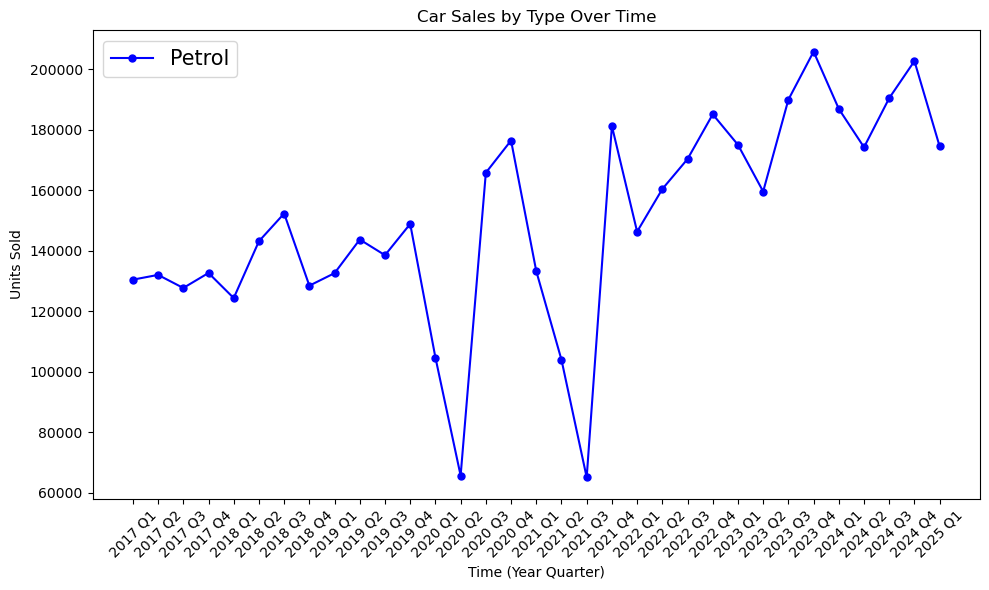

In [19]:
# Data Visualization for Petrol
plt.figure(figsize=(10, 6))
plt.plot(df_combined['time'], df_combined['petrol'], label='Petrol', color='blue', marker='o', markersize=5)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

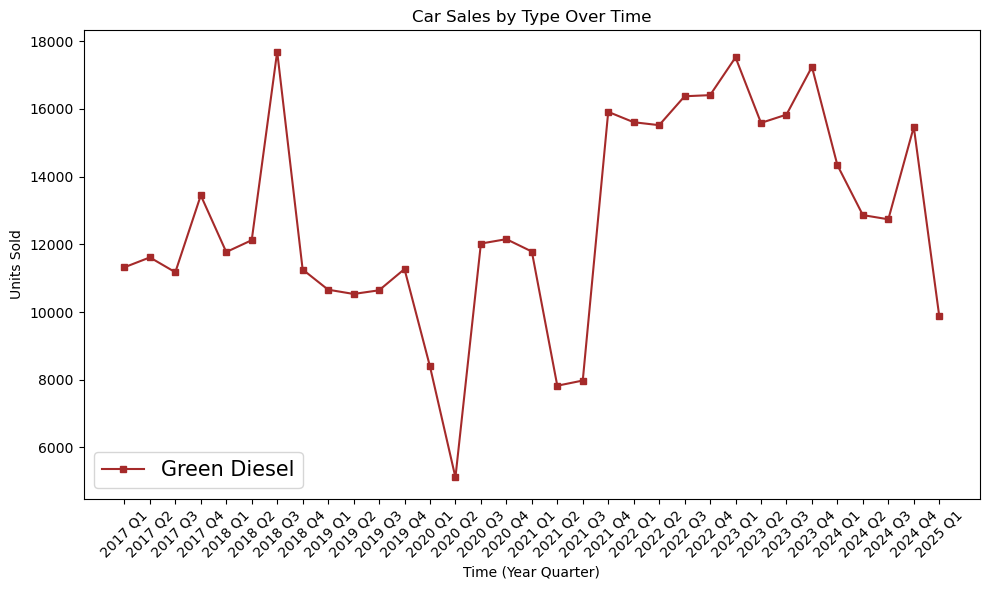

In [20]:
# Data Visualization for Green Diesel
plt.figure(figsize=(10, 6))
plt.plot(df_combined['time'], df_combined['greendiesel'], label='Green Diesel', color='brown', marker='s', markersize=5)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

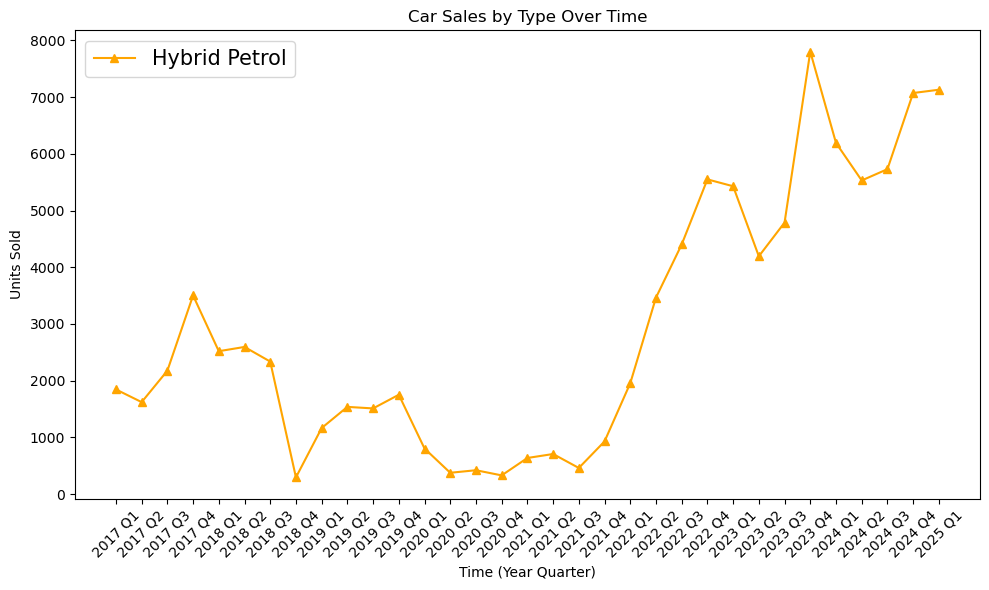

In [21]:
# Data Visualization for Hybrid Petrol
plt.figure(figsize=(10, 6))
plt.plot(df_combined['time'], df_combined['hybrid_petrol'], label='Hybrid Petrol', color='orange', marker='^', markersize=6)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

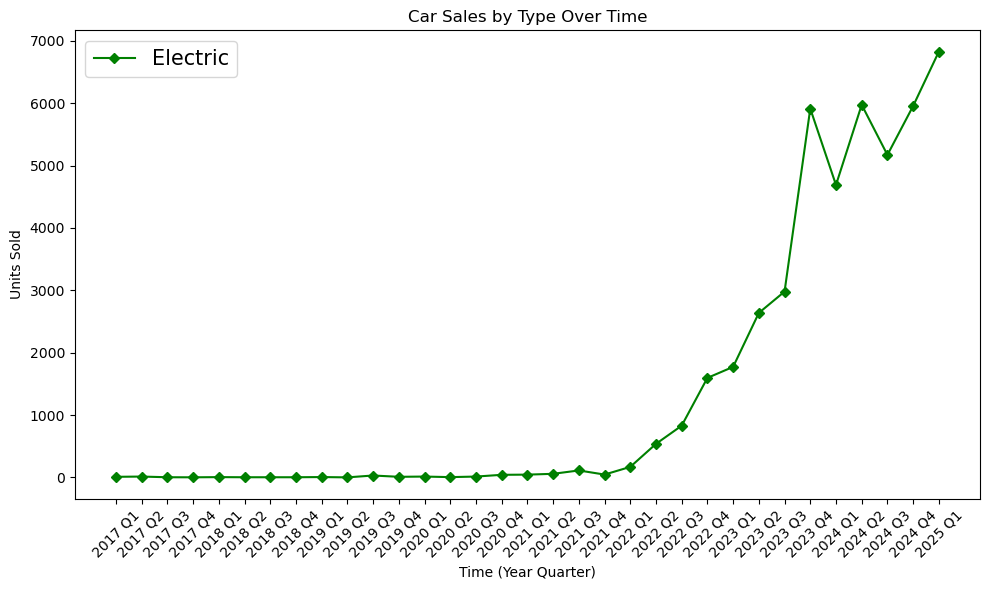

In [22]:
# Data Visualization for Electric
plt.figure(figsize=(10, 6))
plt.plot(df_combined['time'], df_combined['electric'], label='Electric', color='green', marker='D', markersize=5)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

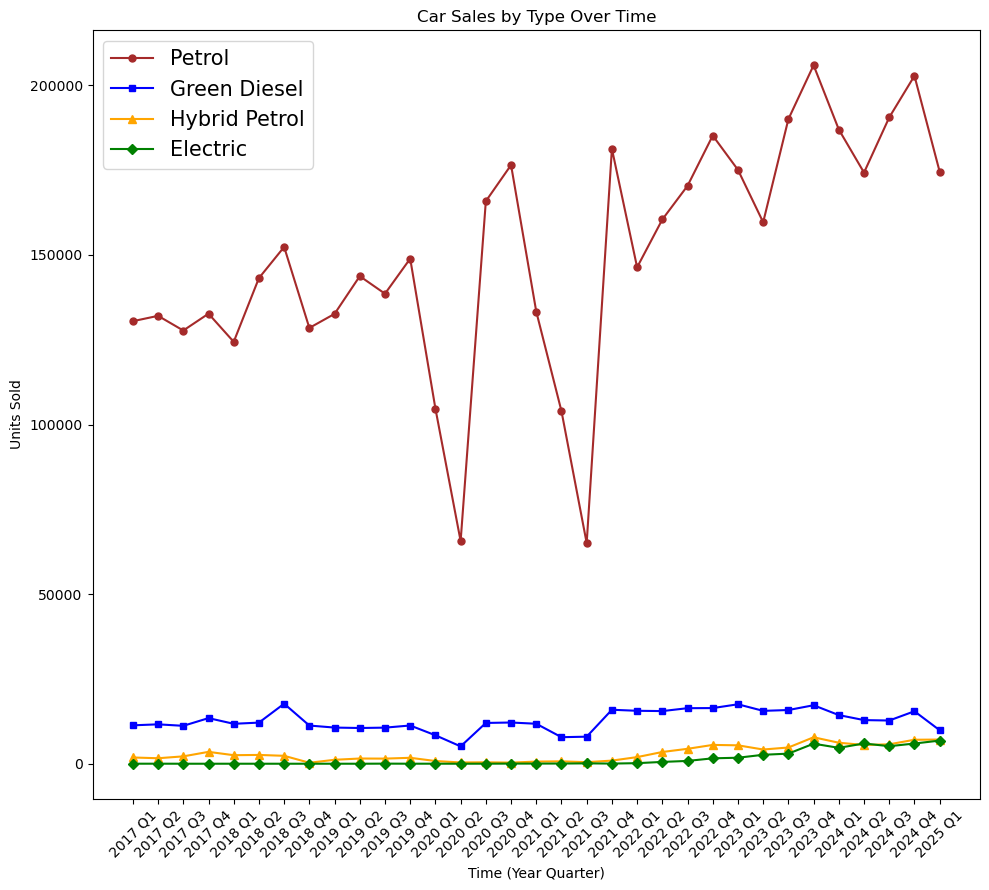

In [ ]:
# Data Visualization for vehicles of various energy types
plt.figure(figsize=(10, 9))

plt.plot(df_combined['time'], df_combined['petrol'], label='Petrol', 
        marker='o', markersize=5, color='brown')
plt.plot(df_combined['time'], df_combined['greendiesel'], label='Green Diesel',
        marker='s', markersize=5, color='blue')
plt.plot(df_combined['time'], df_combined['hybrid_petrol'], label='Hybrid Petrol',
        marker='^', markersize=6, color='orange')
plt.plot(df_combined['time'], df_combined['electric'], label='Electric', 
        marker='D', markersize=5, color='green')

plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()

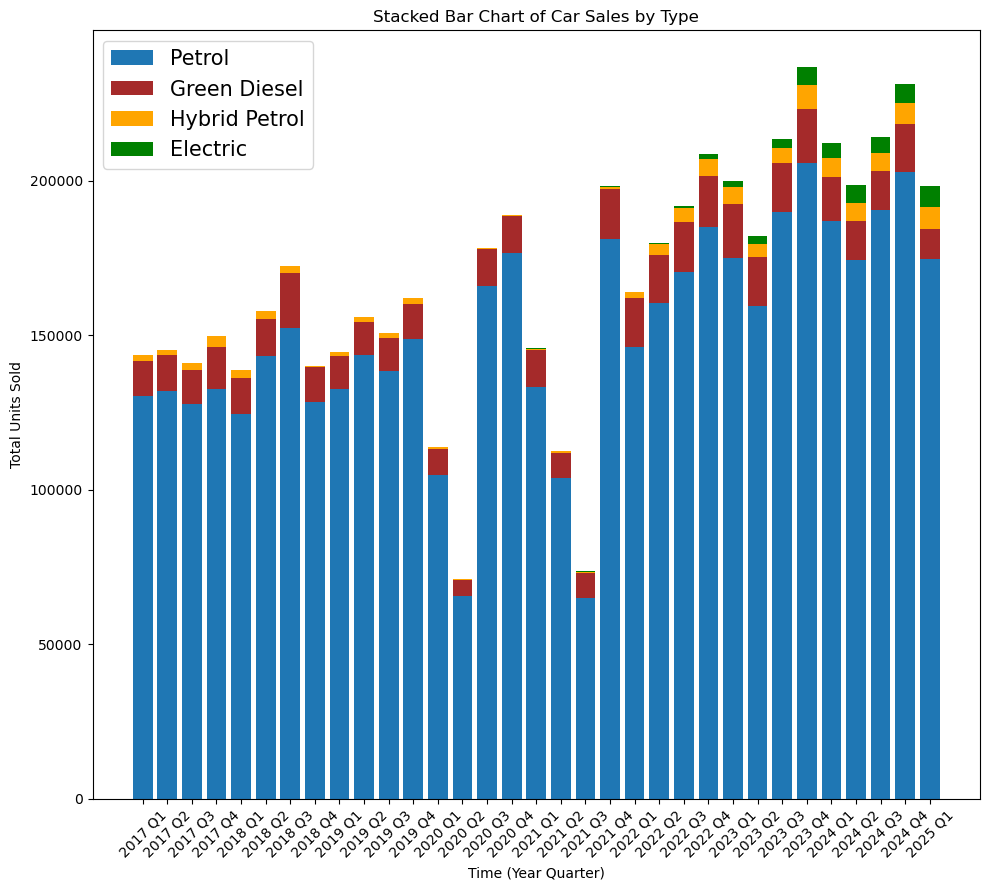

In [24]:
plt.figure(figsize=(10, 9))

plt.bar(df_combined['time'], df_combined['petrol'], 
        label='Petrol')
plt.bar(df_combined['time'], df_combined['greendiesel'], 
        bottom=df_combined['petrol'], 
        label='Green Diesel', color='brown')
plt.bar(df_combined['time'], df_combined['hybrid_petrol'], 
        bottom=df_combined['petrol'] + df_combined['greendiesel'], 
        label='Hybrid Petrol', color='orange')
plt.bar(df_combined['time'], df_combined['electric'], 
        bottom=df_combined['petrol'] + df_combined['greendiesel'] + df_combined['hybrid_petrol'], 
        label='Electric', color='green')

plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Time (Year Quarter)')
plt.ylabel('Total Units Sold')
plt.title('Stacked Bar Chart of Car Sales by Type')
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()

In [25]:
df_average['time'] = df_average['year'].astype(str) + ' ' + df_average['quarter']
df_average.insert(0, 'time', df_average.pop('time'))

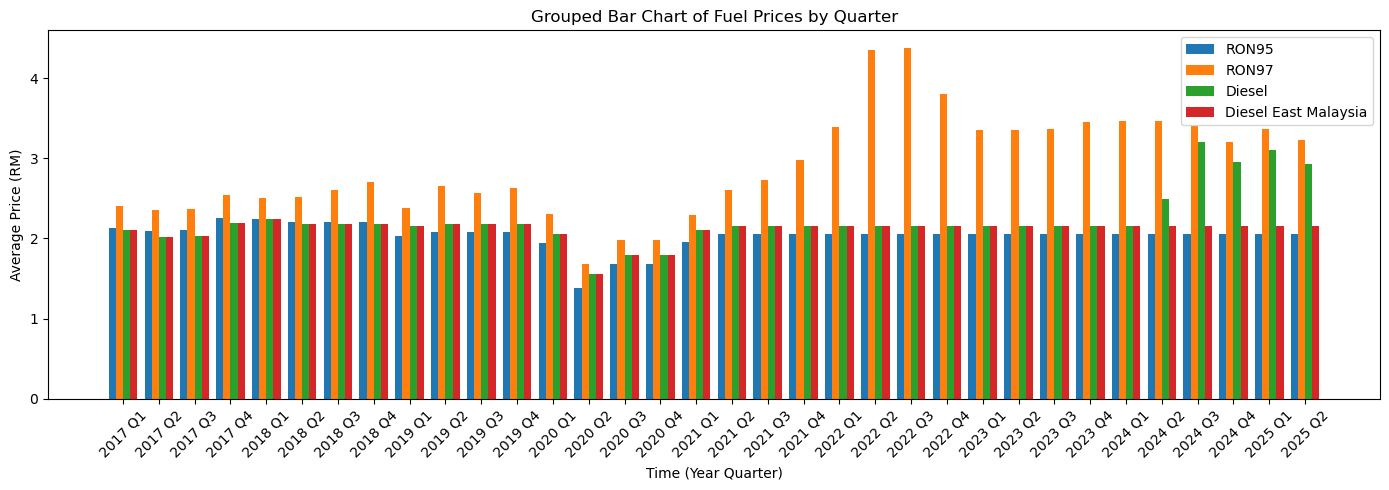

In [26]:
x = np.arange(len(df_average['time']))
width = 0.2

plt.figure(figsize=(14, 5))
plt.bar(x - 1.5 * width, df_average['ron95'], width, label='RON95')
plt.bar(x - 0.5 * width, df_average['ron97'], width, label='RON97')
plt.bar(x + 0.5 * width, df_average['diesel'], width, label='Diesel')
plt.bar(x + 1.5 * width, df_average['diesel_eastmsia'], width, label='Diesel East Malaysia')

plt.xticks(x, df_average['time'], rotation=45)
plt.xlabel('Time (Year Quarter)')
plt.ylabel('Average Price (RM)')
plt.title('Grouped Bar Chart of Fuel Prices by Quarter')
plt.legend()
plt.tight_layout()
plt.show()

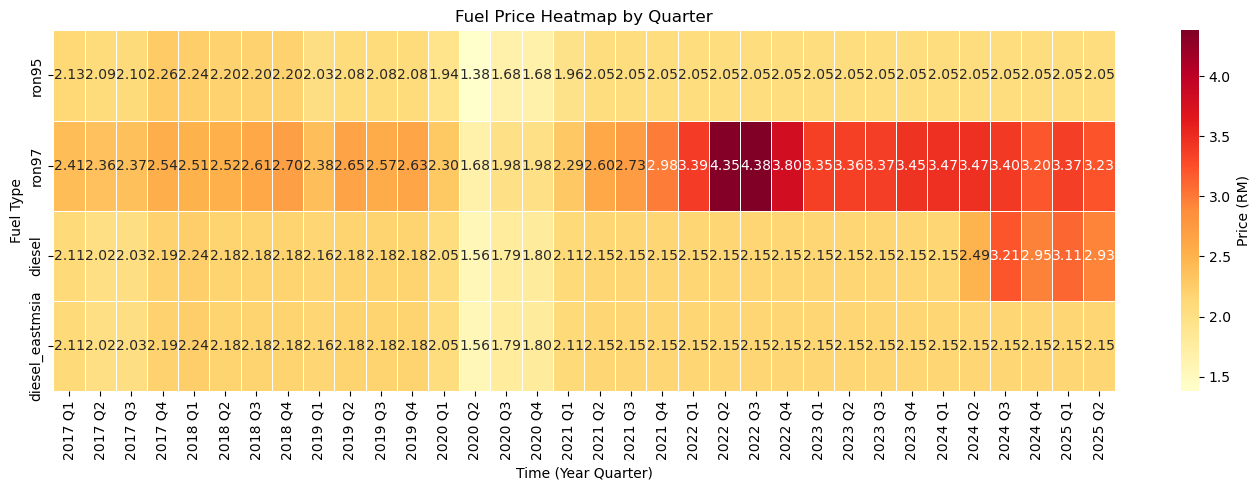

In [27]:
heatmap_data = df_average.set_index('time')[['ron95', 'ron97', 'diesel', 'diesel_eastmsia']].T

plt.figure(figsize=(14, 5))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Price (RM)'}
)

plt.title('Fuel Price Heatmap by Quarter')
plt.xlabel('Time (Year Quarter)')
plt.ylabel('Fuel Type')
plt.tight_layout()
plt.show()

In [28]:
df_combined.head(8)

fuel,time,year,quarter,petrol,greendiesel,hybrid_petrol,electric
0,2017 Q1,2017,Q1,130462,11323,1845,9
1,2017 Q2,2017,Q2,132040,11615,1621,13
2,2017 Q3,2017,Q3,127712,11177,2175,2
3,2017 Q4,2017,Q4,132674,13448,3502,1
4,2018 Q1,2018,Q1,124378,11774,2519,4
5,2018 Q2,2018,Q2,143169,12124,2594,2
6,2018 Q3,2018,Q3,152348,17695,2336,2
7,2018 Q4,2018,Q4,128473,11257,294,2


In [29]:
df_average.head(8)

,time,year,quarter,ron95,ron97,diesel,diesel_eastmsia
0,2017 Q1,2017,Q1,2.13,2.41,2.11,2.11
1,2017 Q2,2017,Q2,2.09,2.36,2.02,2.02
2,2017 Q3,2017,Q3,2.10,2.37,2.03,2.03
3,2017 Q4,2017,Q4,2.26,2.54,2.19,2.19
4,2018 Q1,2018,Q1,2.24,2.51,2.24,2.24
5,2018 Q2,2018,Q2,2.20,2.52,2.18,2.18
6,2018 Q3,2018,Q3,2.20,2.61,2.18,2.18
7,2018 Q4,2018,Q4,2.20,2.70,2.18,2.18


In [30]:
df_cross = pd.merge(df_combined, df_average, on='time')
df_cross.head(8)

,time,year_x,quarter_x,petrol,greendiesel,hybrid_petrol,electric,year_y,quarter_y,ron95,ron97,diesel,diesel_eastmsia
0,2017 Q1,2017,Q1,130462,11323,1845,9,2017,Q1,2.13,2.41,2.11,2.11
1,2017 Q2,2017,Q2,132040,11615,1621,13,2017,Q2,2.09,2.36,2.02,2.02
2,2017 Q3,2017,Q3,127712,11177,2175,2,2017,Q3,2.10,2.37,2.03,2.03
3,2017 Q4,2017,Q4,132674,13448,3502,1,2017,Q4,2.26,2.54,2.19,2.19
4,2018 Q1,2018,Q1,124378,11774,2519,4,2018,Q1,2.24,2.51,2.24,2.24
5,2018 Q2,2018,Q2,143169,12124,2594,2,2018,Q2,2.20,2.52,2.18,2.18
6,2018 Q3,2018,Q3,152348,17695,2336,2,2018,Q3,2.20,2.61,2.18,2.18
7,2018 Q4,2018,Q4,128473,11257,294,2,2018,Q4,2.20,2.70,2.18,2.18


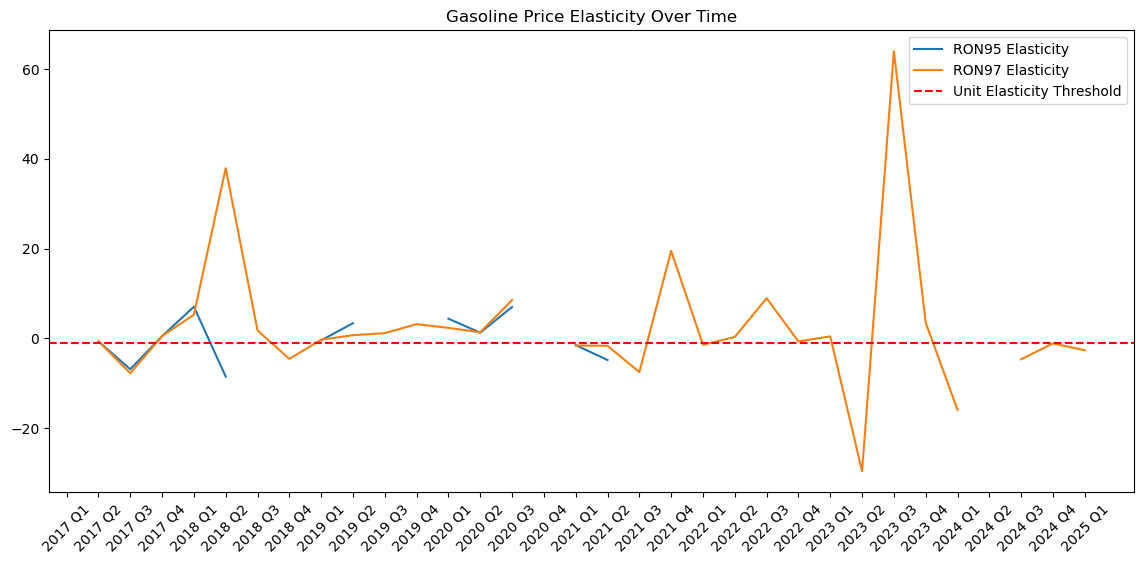

In [ ]:
df_cross['ron95_elasticity'] = df_cross['petrol'].pct_change() / df_cross['ron95'].pct_change()
df_cross['ron97_elasticity'] = df_cross['petrol'].pct_change() / df_cross['ron97'].pct_change()

plt.figure(figsize=(14,6))
plt.plot(df_cross['time'], df_cross['ron95_elasticity'], label='RON95 Elasticity')
plt.plot(df_cross['time'], df_cross['ron97_elasticity'], label='RON97 Elasticity')
plt.axhline(y=-1, color='r', linestyle='--', label='Unit Elasticity Threshold')
plt.xticks(rotation=45)
plt.title('Gasoline Price Elasticity Over Time')
plt.legend()
plt.show()

In [ ]:
df_cross['petrol_diesel_ratio'] = df_cross['ron95'] / df_cross['diesel']
df_cross['ev_share'] = df_cross['electric'] / df_cross[['petrol', 'greendiesel', 'hybrid_petrol', 'electric']].sum(axis=1) * 100

model = ols('ev_share ~ petrol_diesel_ratio + ron95 + diesel', data=df_cross).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ev_share   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     15.87
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           2.70e-06
Time:                        21:10:25   Log-Likelihood:                -32.118
No. Observations:                  33   AIC:                             72.24
Df Residuals:                      29   BIC:                             78.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.9924    

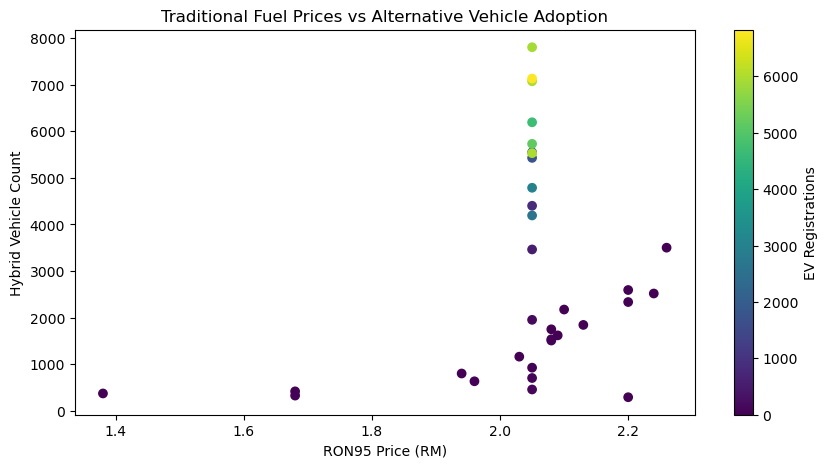

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df_cross['ron95'], df_cross['hybrid_petrol'], c=df_cross['electric'], cmap='viridis')
plt.colorbar(label='EV Registrations')
plt.xlabel('RON95 Price (RM)')
plt.ylabel('Hybrid Vehicle Count')
plt.title('Traditional Fuel Prices vs Alternative Vehicle Adoption')
plt.show()

In [34]:
pre_ev = df_cross[df_cross['time'] <= '2022 Q1']
post_ev = df_cross[df_cross['time'] >= '2022 Q1']

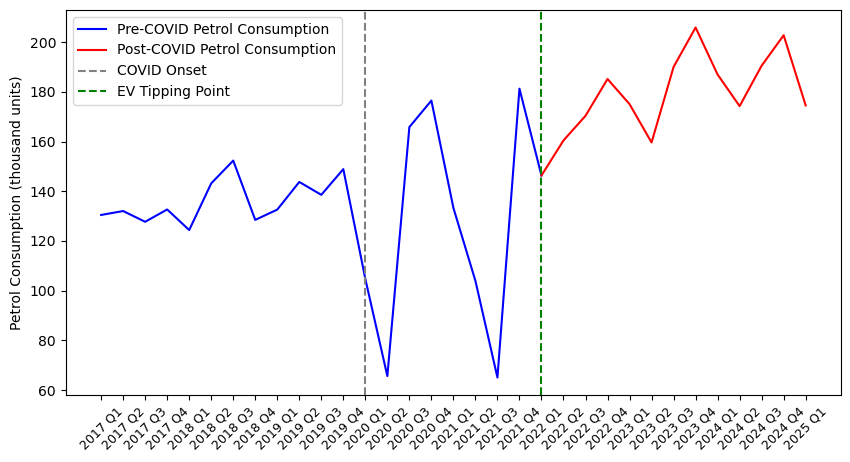

In [35]:
plt.figure(figsize=(10,5))
plt.plot(pre_ev['time'], pre_ev['petrol']/1000, 'b-', label='Pre-COVID Petrol Consumption')
plt.plot(post_ev['time'], post_ev['petrol']/1000, 'r-', label='Post-COVID Petrol Consumption')
plt.axvline(x='2020 Q1', color='gray', linestyle='--', label='COVID Onset')
plt.axvline(x='2022 Q1', color='green', linestyle='--', label='EV Tipping Point')
plt.xticks(rotation=45, fontsize=9)
plt.ylabel('Petrol Consumption (thousand units)')
plt.legend()
plt.show()

In [36]:
df_share = df_combined.copy()
df_share['year'] = df_share['year'].astype(int)

df_share['total'] = df_share[['petrol', 'greendiesel', 'hybrid_petrol', 'electric']].sum(axis=1)

df_share['petrol_share'] = df_share['petrol'] / df_share['total']
df_share['greendiesel_share'] = df_share['greendiesel'] / df_share['total']
df_share['hybrid_petrol_share'] = df_share['hybrid_petrol'] / df_share['total']
df_share['electric_share'] = df_share['electric'] / df_share['total']

df_share.to_csv('Data/data_share.csv', index=False)
df_share

fuel,time,year,quarter,petrol,greendiesel,hybrid_petrol,electric,total,petrol_share,greendiesel_share,hybrid_petrol_share,electric_share
0,2017 Q1,2017,Q1,130462,11323,1845,9,143639,0.908263,0.078830,0.012845,0.000063
1,2017 Q2,2017,Q2,132040,11615,1621,13,145289,0.908809,0.079944,0.011157,0.000089
2,2017 Q3,2017,Q3,127712,11177,2175,2,141066,0.905335,0.079232,0.015418,0.000014
3,2017 Q4,2017,Q4,132674,13448,3502,1,149625,0.886710,0.089878,0.023405,0.000007
4,2018 Q1,2018,Q1,124378,11774,2519,4,138675,0.896903,0.084904,0.018165,0.000029
5,2018 Q2,2018,Q2,143169,12124,2594,2,157889,0.906770,0.076788,0.016429,0.000013
6,2018 Q3,2018,Q3,152348,17695,2336,2,172381,0.883786,0.102651,0.013551,0.000012
7,2018 Q4,2018,Q4,128473,11257,294,2,140026,0.917494,0.080392,0.002100,0.000014
8,2019 Q1,2019,Q1,132618,10661,1164,5,144448,0.918102,0.073805,0.008058,0.000035
9,2019 Q2,2019,Q2,143735,10535,1537,0,155807,0.922520,0.067616,0.009865,0.000000


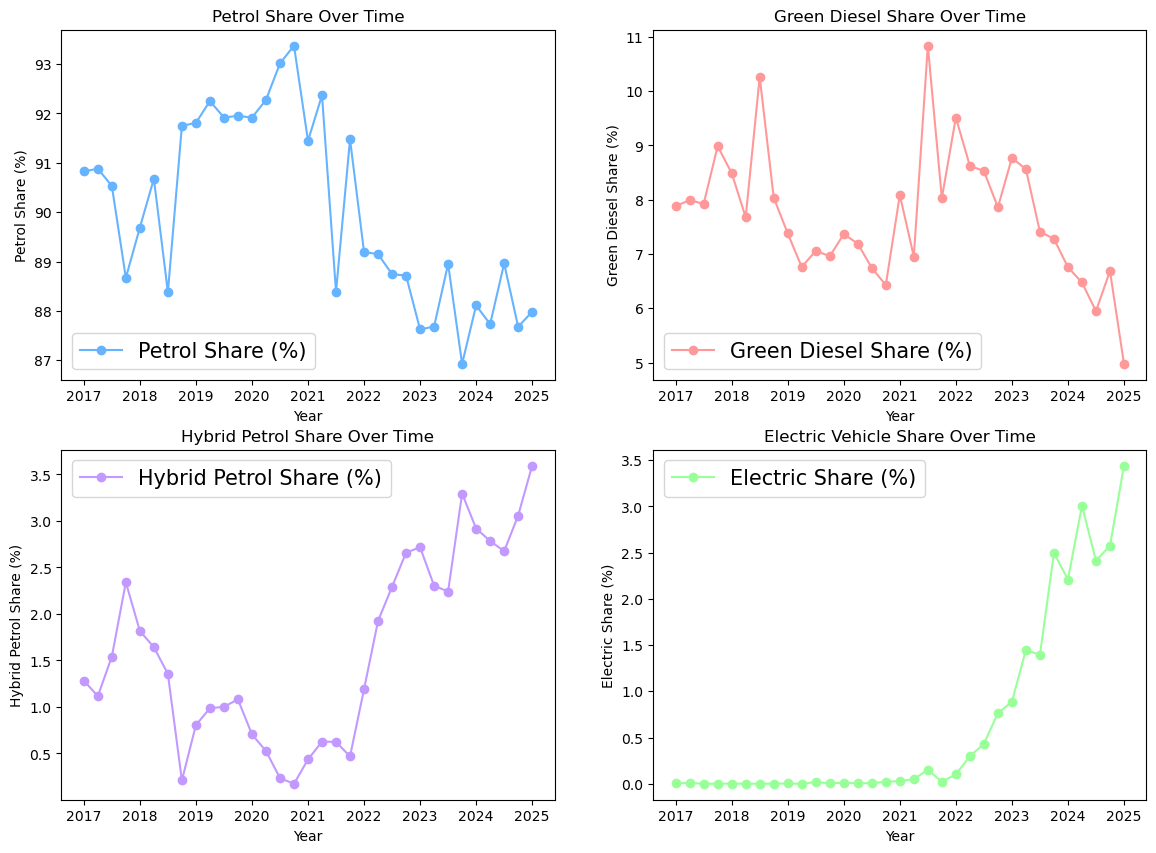

In [37]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(
    df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4, 
    df_share['petrol_share']*100, 'o-', 
    label='Petrol Share (%)', color='#66b3ff')
plt.title('Petrol Share Over Time')
plt.xlabel('Year')
plt.ylabel('Petrol Share (%)')
plt.legend(loc='lower left', fontsize=15)

plt.subplot(2, 2, 2)
plt.plot(
    df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4, 
    df_share['greendiesel_share']*100, 'o-', 
    label='Green Diesel Share (%)', color='#ff9999')
plt.title('Green Diesel Share Over Time')
plt.xlabel('Year')
plt.ylabel('Green Diesel Share (%)')
plt.legend(loc='lower left', fontsize=15)

plt.subplot(2, 2, 3)
plt.plot(
    df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4, 
    df_share['hybrid_petrol_share']*100, 'o-', 
    label='Hybrid Petrol Share (%)', color='#c299ff')
plt.title('Hybrid Petrol Share Over Time')
plt.xlabel('Year')
plt.ylabel('Hybrid Petrol Share (%)')
plt.legend(loc='upper left', fontsize=15)

plt.subplot(2, 2, 4)
plt.plot(
    df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4, 
    df_share['electric_share']*100, 'o-', 
    label='Electric Share (%)', color='#99ff99')
plt.title('Electric Vehicle Share Over Time')
plt.xlabel('Year')
plt.ylabel('Electric Share (%)')
plt.legend(loc='upper left', fontsize=15)

plt.show()

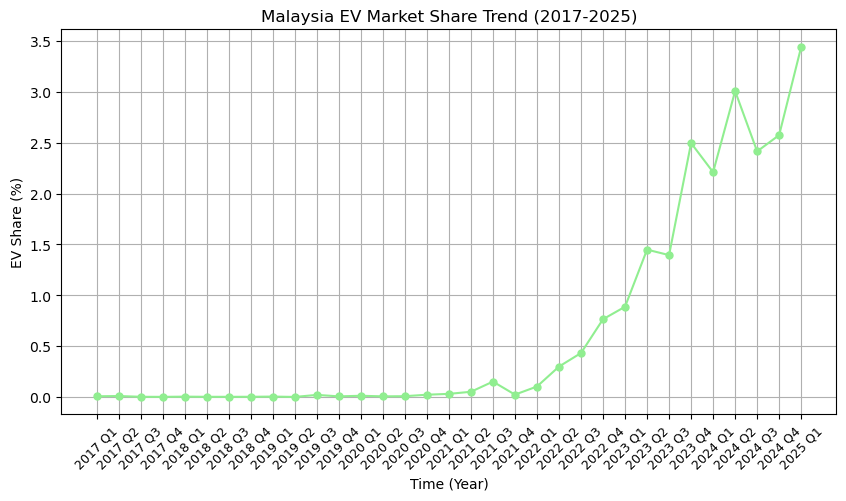

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df_share['time'], df_share['electric_share']*100, 'o-', color='lightgreen', markersize=5, label='EV Share (%)')
plt.title('Malaysia EV Market Share Trend (2017-2025)')
plt.xticks(rotation=45, fontsize=9)
plt.xlabel('Time (Year)')
plt.ylabel('EV Share (%)')
plt.grid(True)
plt.show()

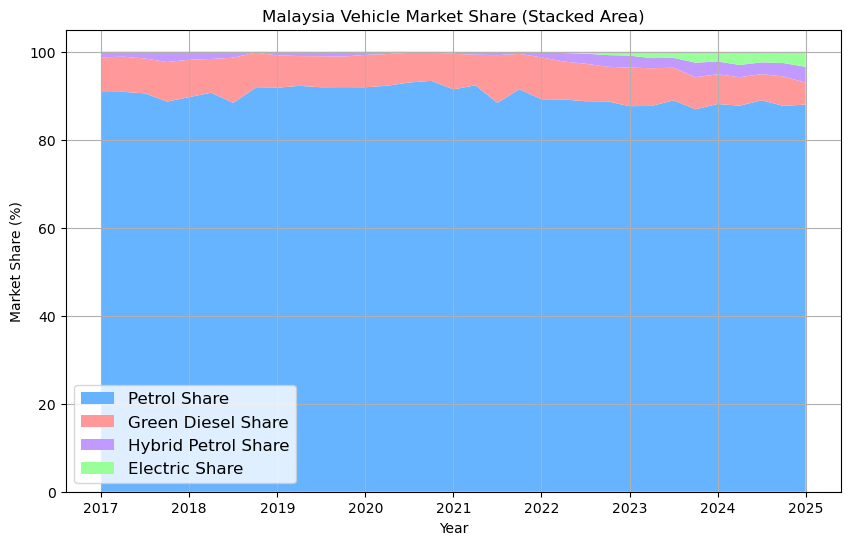

In [39]:
plt.figure(figsize=(10,6))

share_df = pd.DataFrame({
    'time': df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4,
    'Petrol Share': df_share['petrol_share'],
    'Green Diesel Share': df_share['greendiesel_share'],
    'Hybrid Petrol Share': df_share['hybrid_petrol_share'],
    'Electric Share': df_share['electric_share']
})

plt.stackplot(
    share_df['time'],
    [share_df[col]*100 for col in ['Petrol Share', 'Green Diesel Share', 'Hybrid Petrol Share', 'Electric Share']],
    labels=share_df.columns[1:],
    colors=['#66b3ff', '#ff9999', '#c299ff', '#99ff99']
)

plt.title('Malaysia Vehicle Market Share (Stacked Area)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(loc='lower left', fontsize='large')
plt.grid(True)
plt.show()